In [1]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.keras')

In [2]:

model.layers

[<Conv2D name=conv2d_4, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Conv2D name=conv2d_5, built=True>,
 <MaxPooling2D name=max_pooling2d_4, built=True>,
 <Flatten name=flatten_2, built=True>,
 <Dense name=dense_4, built=True>,
 <Dropout name=dropout_2, built=True>,
 <Dense name=dense_5, built=True>]

In [3]:

conv = model.layers[0]
print(conv.weights[0].shape)

(3, 3, 1, 32)


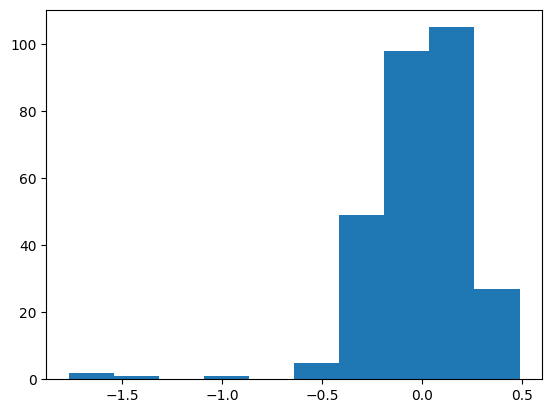

In [4]:
import matplotlib.pyplot as plt
plt.hist(conv.weights[0].numpy().reshape(-1, 1))
plt.show()

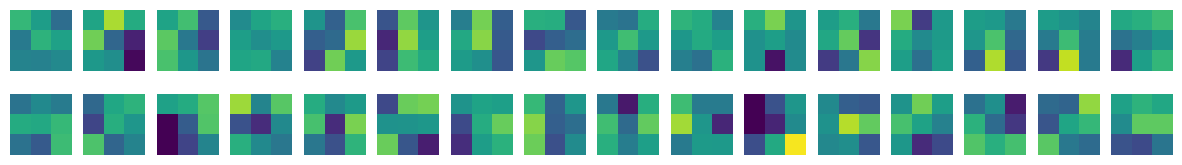

In [5]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
conv_weights = conv.weights[0].numpy()
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(
            conv_weights[:, :, 0, i*16 + j],
            vmin=-0.5, 
            vmax=0.5, 
        )
        axs[i, j].axis('off')
plt.show()

In [6]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

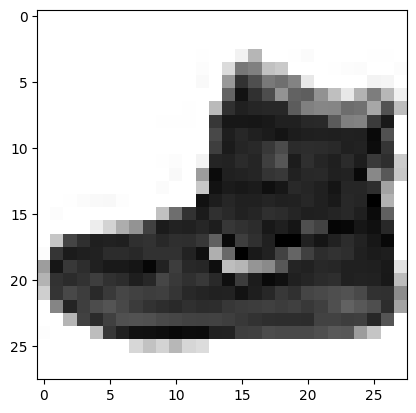

In [7]:

plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [9]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0

In [10]:
conv_acti = keras.Model(model.layers[0].input, model.layers[0].output)

In [11]:

feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


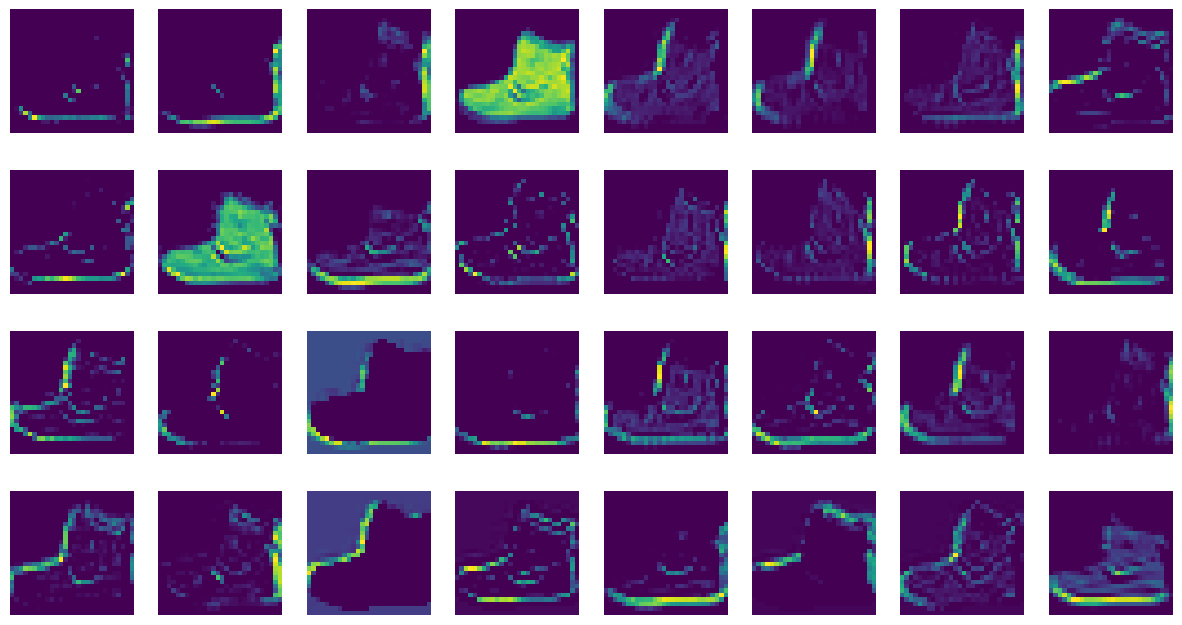

In [12]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:, :, i*8+j])
        axs[i, j].axis('off')
plt.show()